In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
from utils import *
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# File loading
df = pd.read_excel(r'..\..\Data\Sales.xlsx', 'Sheet1')
df.name = 'Sales'

In [3]:
# Dataframe head
df.head()

,Cal Date,Cust Sold To Nbr,Product 5-digit Code,QTY Pieces,VBR,ISV excl Log Sur,Logistic Surcharge,COS,Dist Costs
0,2017-02-22,28502952,50601M,2000.0,0.0,180.0,0.0,86.64,38.60
1,2017-07-26,28502952,50601M,2000.0,0.0,180.0,0.0,86.64,38.60
2,2017-12-21,28502952,50601M,1000.0,0.0,90.0,0.0,43.32,19.30
3,2018-06-15,28502952,50601M,1500.0,0.0,135.0,0.0,64.98,28.95
4,2017-02-22,28502952,50602M,4000.0,0.0,370.0,0.0,180.88,77.20


In [4]:
# Dataframe shape
df_shape = df.shape
print("This dataframe has %d columns and %d rows." % (df_shape[1], df_shape[0]))

This dataframe has 9 columns and 605487 rows.


In [5]:
mx = max(df['Cal Date'])
mn = min(df['Cal Date'])
delta_date = (mx-mn).days
y = delta_date//365
m = (delta_date-y*365)//30
d = delta_date-y*365-m*30

print('the first sale was done at ', mn)
print('the last sale was done at ', mx)
print('the sales span %d year %d months %d days' % (y,m,d))

the first sale was done at  2017-01-01 00:00:00
the last sale was done at  2018-06-30 00:00:00
the sales span 1 year 6 months 0 days


In [21]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605487 entries, 0 to 605486
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Cal Date              605487 non-null  datetime64[ns]
 1   Cust Sold To Nbr      605487 non-null  object        
 2   Product 5-digit Code  605487 non-null  object        
 3   QTY Pieces            605487 non-null  float64       
 4   VBR                   605487 non-null  float64       
 5   ISV excl Log Sur      605487 non-null  float64       
 6   Logistic Surcharge    605487 non-null  float64       
 7   COS                   605487 non-null  float64       
 8   Dist Costs            605487 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 41.6+ MB


In [22]:
df["Cust Sold To Nbr"]=df["Cust Sold To Nbr"].astype(object)

In [8]:
df.describe()

,QTY Pieces,VBR,ISV excl Log Sur,Logistic Surcharge,COS,Dist Costs
count,6.054870e+05,605487.000000,6.054870e+05,605487.000000,605487.000000,605487.000000
mean,1.395991e+03,-8.010553,4.442257e+02,1.798414,237.549062,24.964773
std,2.653016e+04,181.386871,3.433859e+03,36.888962,1275.116648,101.417216
min,-7.200000e+05,-25562.741873,-1.299681e+06,-4396.726150,-104438.440000,-5245.000000
25%,0.000000e+00,-1.270000,0.000000e+00,0.000000,0.000000,0.000000
50%,2.000000e+01,0.000000,9.294000e+01,0.000000,44.550000,5.830000
75%,2.160000e+02,0.000000,3.078000e+02,0.000000,155.960000,20.790000
max,8.000000e+06,32539.411602,1.299681e+06,10209.122676,224682.740000,12178.800000


<Figure size 432x288 with 0 Axes>

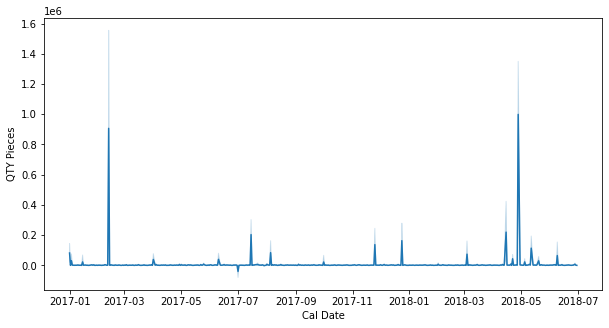

<Figure size 432x288 with 0 Axes>

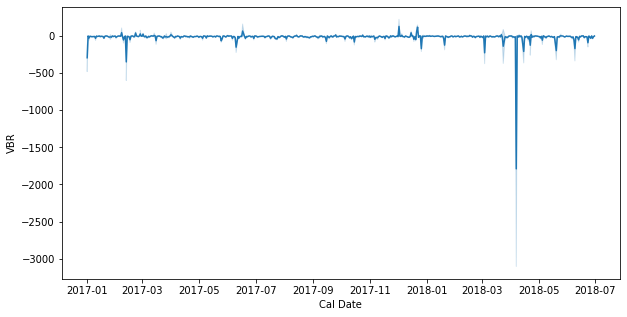

<Figure size 432x288 with 0 Axes>

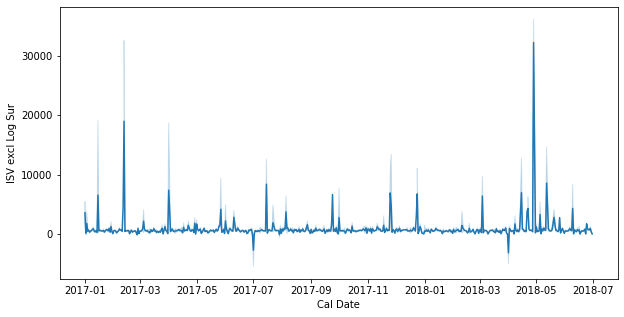

<Figure size 432x288 with 0 Axes>

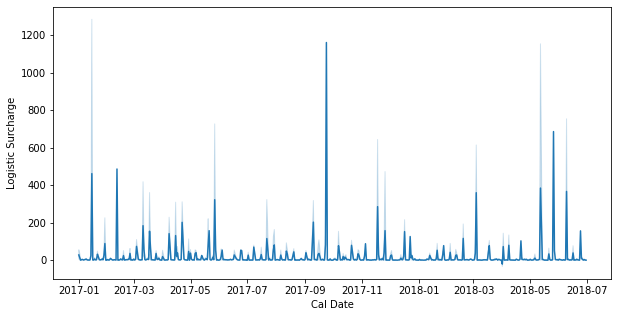

<Figure size 432x288 with 0 Axes>

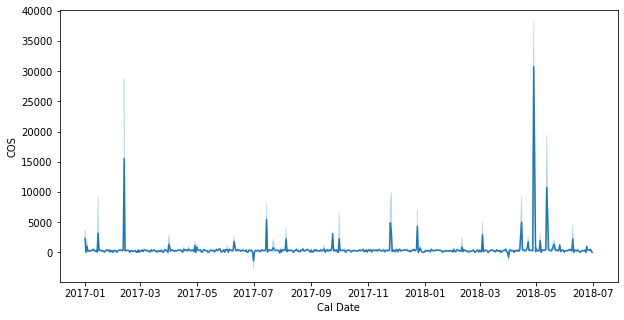

<Figure size 432x288 with 0 Axes>

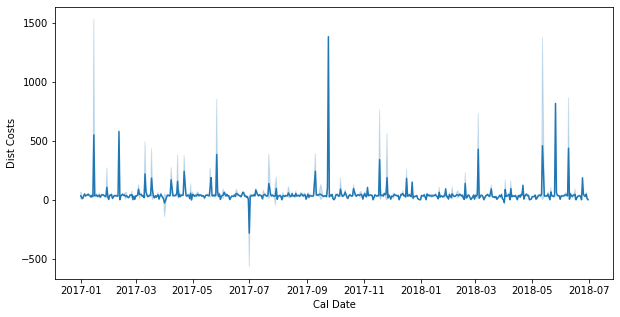

In [11]:
plot_by_date(df, 'Cal Date')

In [18]:
df_sold_not_sample = df.loc[(df['QTY Pieces']!=0)&(df['ISV excl Log Sur']!=0)]

<Figure size 432x288 with 0 Axes>

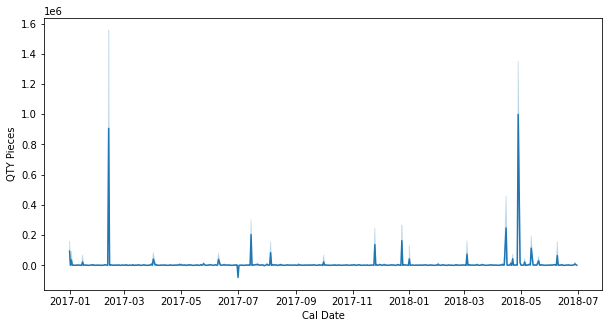

<Figure size 432x288 with 0 Axes>

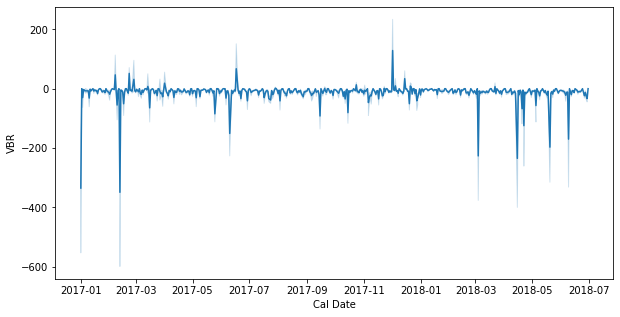

<Figure size 432x288 with 0 Axes>

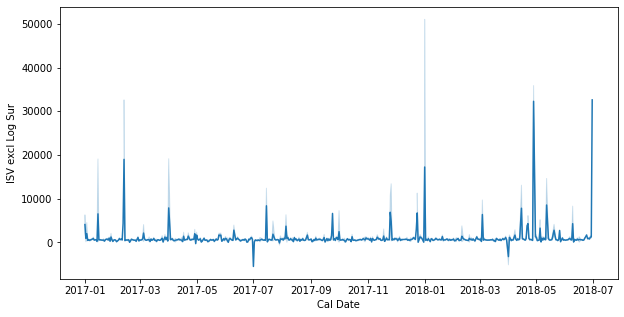

<Figure size 432x288 with 0 Axes>

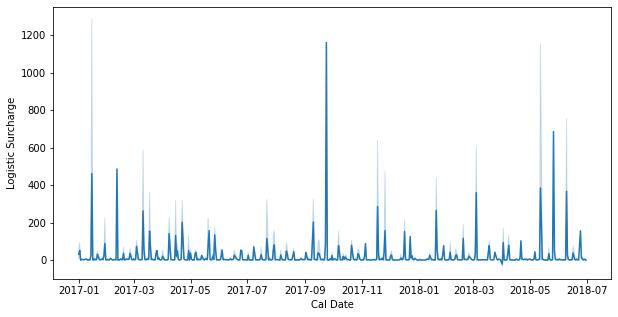

<Figure size 432x288 with 0 Axes>

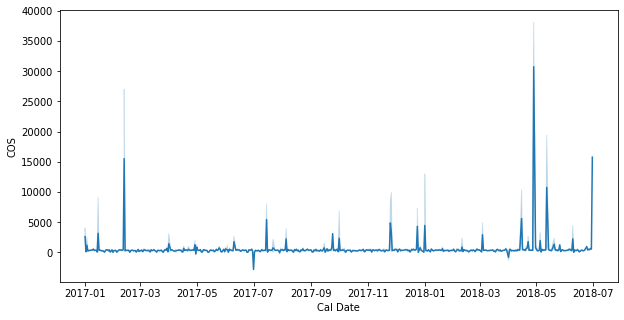

<Figure size 432x288 with 0 Axes>

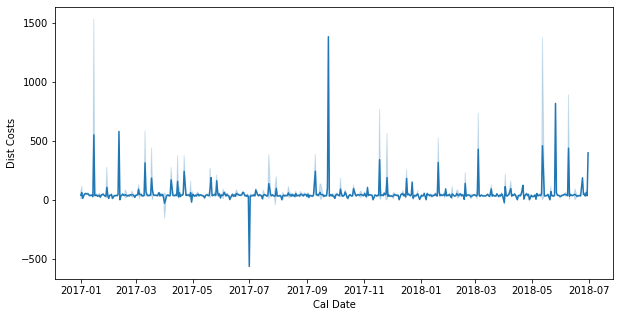

In [17]:
plot_by_date(df_sold_not_sample, 'Cal Date')

In [25]:
df_sold_not_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398922 entries, 0 to 605480
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Cal Date              398922 non-null  datetime64[ns]
 1   Cust Sold To Nbr      398922 non-null  object        
 2   Product 5-digit Code  398922 non-null  object        
 3   QTY Pieces            398922 non-null  float64       
 4   VBR                   398922 non-null  float64       
 5   ISV excl Log Sur      398922 non-null  float64       
 6   Logistic Surcharge    398922 non-null  float64       
 7   COS                   398922 non-null  float64       
 8   Dist Costs            398922 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 30.4+ MB


In [36]:
cols = set(df_sold_not_sample.columns) - set(['Cust Sold To Nbr', 'QTY Pieces'])

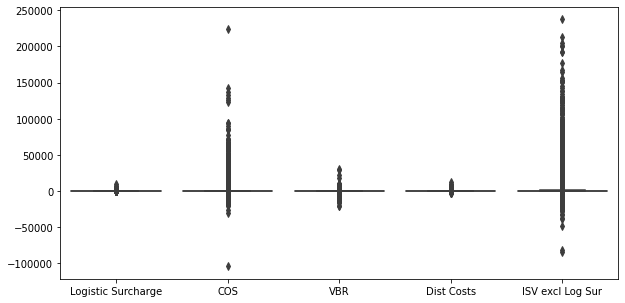

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_sold_not_sample.loc[:, set(df_sold_not_sample.columns) - set(['Cust Sold To Nbr', 'QTY Pieces'])])
plt.show()

<Figure size 432x288 with 0 Axes>

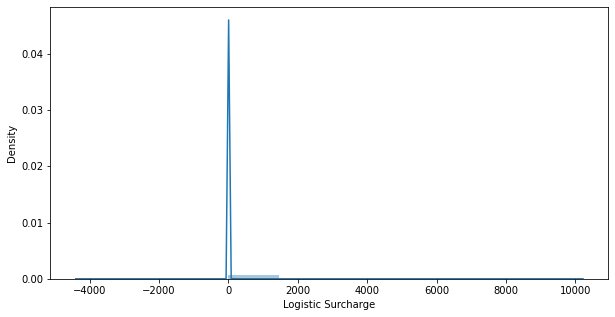

<Figure size 432x288 with 0 Axes>

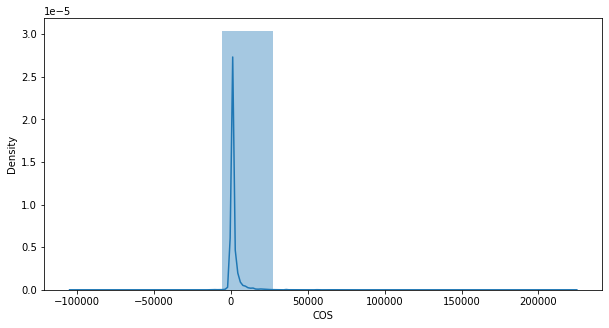

<Figure size 432x288 with 0 Axes>

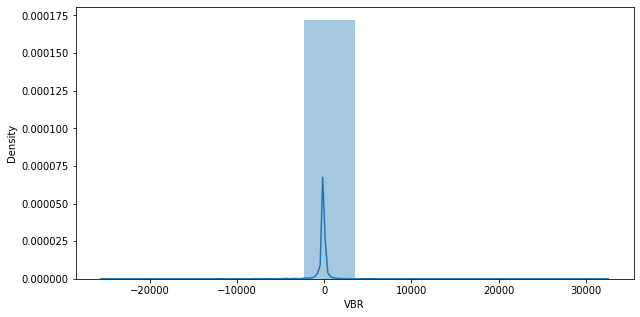

<Figure size 432x288 with 0 Axes>

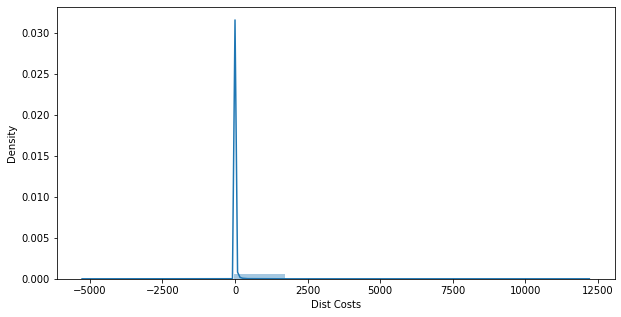

<Figure size 432x288 with 0 Axes>

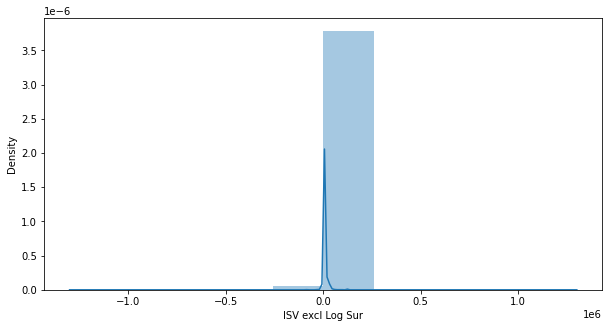

In [37]:
distributions(df.loc[:, cols])

In [9]:
# Categorical features modalities
modalities_table(df)

,Modalities
Product 5-digit Code,4395
Cust Sold To Nbr,4804


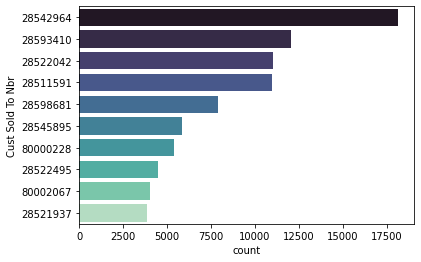

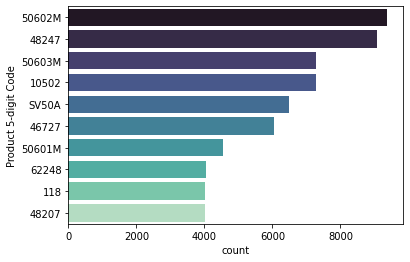

In [10]:
# Distribution of categorical columns        
plot_cat_dist_h(df)

In [ ]:
df[df.eq('-').any(1)]

In [ ]:
# Replacing missing values with None
df.replace({'-': None},inplace=True)
df[df.isnull().any(axis=1)]

In [ ]:
print("The number of rows with null values in both columns is %d row" 
      % df[((df.iloc[:,1].isnull())&(df.iloc[:,2].isnull()))].shape[0])

In [ ]:
df.iloc[:,2].isnull()

In [ ]:
# Missing value summary
missing_values_table(df)

In [ ]:
# Missing values export
save_missing_values_table(df, df.name)

In [ ]:
# Categorical features modalities
modalities_table(df, True)

In [ ]:
# Net Sales Value and Gross Margin
df['NSV'] = df['ISV excl Log Sur'] + df['VBR'] +  df['Logistic Surcharge']
df['GM'] = df['NSV'] - df['COS'] -  df['Dist Costs']

In [ ]:
df_out = df[(np.abs(stats.zscore(df[df.select_dtypes('number').columns])) > 3).all(axis=1)]
boxplot_by_cat(df_out, 'Product 5-digit Code')

In [ ]:
for c in df.select_dtypes(['float']).columns:
    a = max(df[c].astype(str).str.split('.').str[0].str.len())
    b = max(df[c].astype(str).str.split('.').str[1].str.len())
    print(c+'decimal(%d, %d),' % (a+b, b))

In [ ]:
df.info()

## The sale facts should be in this schema :
<br/>
[sale_ID] [int] IDENTITY(1,1) NOT NULL,<br/>
[val_based_rebate] [float] NOT NULL,<br/>
[invoice_sale_val] [float] NOT NULL,<br/>
[logistic_sur] [float] NOT NULL,<br/>
[sale_cost] [float] NOT NULL,<br/>
[dist_cost] [float] NOT NULL,<br/>
[net_sale_revenue] [float] NOT NULL,<br/>
[gross_margin] [float] NOT NULL,<br/>
[customer_ID] [int] NOT NULL,<br/>
[product_ID] [int] NOT NULL,<br/>
[date_ID] [int] NOT NULL,<br/>
[salesrep_ID] [int] NOT NULL